# Introdução
Será utilizado o conjunto de dados Wine.

# Passo 1: importar as bibliotecas necessárias

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
from google.colab import files
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [136]:
# Carregar o conjunto de dados Wine Quality (vinho tinto)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Visualizar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame winequality-red:")
print(df.head())

# Descrição das colunas
column_descriptions = {
    'fixed acidity': 'Acidez fixa (g/dm³) - ácidos que não evaporam rapidamente.',
    'volatile acidity': 'Acidez volátil (g/dm³) - quantidade de ácidos que evaporam facilmente e podem causar aromas desagradáveis.',
    'citric acid': 'Ácido cítrico (g/dm³) - ácido natural encontrado em citrinos, contribui para o frescor e sabor do vinho.',
    'residual sugar': 'Açúcar residual (g/dm³) - quantidade de açúcar que sobra após a fermentação, afeta o sabor e a percepção de doçura do vinho.',
    'chlorides': 'Cloretos (g/dm³) - quantidade de sal no vinho, que pode afetar o sabor.',
    'free sulfur dioxide': 'Dióxido de enxofre livre (mg/dm³) - forma de SO2 que está livre no vinho e pode agir como agente antimicrobiano e antioxidante.',
    'total sulfur dioxide': 'Dióxido de enxofre total (mg/dm³) - soma de todas as formas de SO2, tanto livres quanto ligadas.',
    'density': 'Densidade (g/cm³) - medida da densidade do vinho, que pode ser influenciada pelo conteúdo de açúcar e álcool.',
    'pH': 'pH - medida de acidez ou basicidade do vinho.',
    'sulphates': 'Sulfatos (g/dm³) - aditivo que pode contribuir para o sabor e atuar como conservante.',
    'alcohol': 'Álcool (% em volume) - teor alcoólico do vinho.',
    'quality': 'Qualidade (pontuação entre 0 e 10) - avaliação sensorial da qualidade do vinho, usada como variável alvo.'
}

print("\nDescrição das colunas:")
for column, description in column_descriptions.items():
    print(f"{column}: {description}")

Primeiras linhas do DataFrame winequality-red:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4       

In [137]:
# Salvar o DataFrame como um arquivo CSV
df.to_csv('winequality-red.csv', index=False)

In [138]:
# Baixar o arquivo CSV para pasta local
files.download('winequality-red.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Passo 2: Dividir o Conjunto de Dados em Treinamento e Teste

In [139]:
# Separar as features e o target
X = df.drop(columns=['quality'])
y = df['quality']
print(X.shape, y.shape)

(1599, 11) (1599,)


In [140]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualizar o shape dos dados
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [141]:
# Selecionar os 5 melhores atributos
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
print("Scores dos atributos:", selector.scores_)
selected_features = X.columns[selector.get_support()]
print("Atributos selecionados:", selected_features)

Scores dos atributos: [ 3.037159   41.06954181 10.55710335  0.93466388  4.31802563  2.9186981
 19.75596243 11.19979797  2.55313198 14.77201409 88.53897644]
Atributos selecionados: Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


# Passo 4: Treinar e Avaliar um Modelo Antes e Depois da Seleção de Atributos

In [142]:
# Treinar o modelo com todos os atributos
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia com todos os atributos:", accuracy)

Acurácia com todos os atributos: 0.6541666666666667


In [143]:
# Treinar o modelo com os atributos selecionados
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Acurácia com atributos selecionados:", accuracy_selected)

Acurácia com atributos selecionados: 0.65625


## Passo 6: Gerar uma conjunto de dados sintético baseado no arquivo original

In [144]:
# Definir o número de amostras para o novo conjunto de dados
n_samples = 100

# Gerar dados sintéticos baseados nas distribuições observadas no conjunto de dados original
np.random.seed(42)
data = {
    'fixed acidity': np.random.normal(loc=8.32, scale=1.74, size=n_samples),
    'volatile acidity': np.random.normal(loc=0.53, scale=0.18, size=n_samples),
    'citric acid': np.random.normal(loc=0.27, scale=0.19, size=n_samples),
    'residual sugar': np.random.normal(loc=2.54, scale=1.41, size=n_samples),
    'chlorides': np.random.normal(loc=0.09, scale=0.05, size=n_samples),
    'free sulfur dioxide': np.random.normal(loc=15.87, scale=10.46, size=n_samples),
    'total sulfur dioxide': np.random.normal(loc=46.47, scale=32.90, size=n_samples),
    'density': np.random.normal(loc=0.9967, scale=0.0019, size=n_samples),
    'pH': np.random.normal(loc=3.31, scale=0.15, size=n_samples),
    'sulphates': np.random.normal(loc=0.66, scale=0.17, size=n_samples),
    'alcohol': np.random.normal(loc=10.42, scale=1.07, size=n_samples),
    'quality': np.random.randint(3, 9, size=n_samples)  # Qualidade variando de 3 a 8
}

# Criar um DataFrame com os dados sintéticos
df_new = pd.DataFrame(data)

# Salvar o novo conjunto de dados como um arquivo CSV
df_new.to_csv('new_synthetic_winequality_red.csv', index=False)

# Carregar o novo conjunto de dados (simulando a situação)
df_new_loaded = pd.read_csv('new_synthetic_winequality_red.csv')

print("Primeiras linhas do novo DataFrame sintético:")
print(df_new_loaded.head())

Primeiras linhas do novo DataFrame sintético:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       9.184283          0.275233     0.337980        1.371117   0.010279   
1       8.079420          0.454284     0.376549        1.750145   0.060031   
2       9.446978          0.468311     0.475780        3.593684   0.090262   
3      10.970072          0.385590     0.470222        3.400622   0.092349   
4       7.912573          0.500969     0.008243        2.510529   0.067497   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            25.557817             71.374925  0.995707  3.450743   0.722674   
1            35.842498             16.130761  0.998693  3.232593   0.593132   
2             1.240983             75.080035  0.995362  3.324418   0.664887   
3            21.758658             91.070486  0.994024  3.240659   0.877337   
4             9.064279             60.072008  0.993742  3.244826   0.692487   

     alcoh

In [145]:
# Contar o número de linhas usando o método .count()
num_rows = df_new_loaded.count()[0]
print(f"O número de linhas do DataFrame é: {num_rows}")

O número de linhas do DataFrame é: 100


In [146]:
# Salvar o DataFrame como um arquivo CSV
df_new_loaded.to_csv('new_synthetic_winequality_red.csv', index=False)

In [125]:
# Baixar o arquivo CSV para a pasta local
files.download('new_synthetic_winequality_red.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
# Ler o arquivo CSV
df = pd.read_csv('new_synthetic_winequality_red.csv')

In [148]:
# Visualizar as primeiras linhas do DataFrame para garantir que foi carregado corretamente
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       9.184283          0.275233     0.337980        1.371117   0.010279   
1       8.079420          0.454284     0.376549        1.750145   0.060031   
2       9.446978          0.468311     0.475780        3.593684   0.090262   
3      10.970072          0.385590     0.470222        3.400622   0.092349   
4       7.912573          0.500969     0.008243        2.510529   0.067497   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            25.557817             71.374925  0.995707  3.450743   0.722674   
1            35.842498             16.130761  0.998693  3.232593   0.593132   
2             1.240983             75.080035  0.995362  3.324418   0.664887   
3            21.758658             91.070486  0.994024  3.240659   0.877337   
4             9.064279             60.072008  0.993742  3.244826   0.692487   

     alcohol  quality  
0  11.917310        5  
1  11.40

In [171]:
# Calcular a frequência de cada valor na coluna 'quality' ordenado por ordem crescente de "quality"
quality_counts = df['quality'].value_counts().sort_index()

In [173]:
# Exibir a frequência
print("\nFrequência de cada valor na coluna 'quality':")
print(quality_counts)


Frequência de cada valor na coluna 'quality':
quality
3    22
4    20
5    12
6    12
7    15
8    19
Name: count, dtype: int64


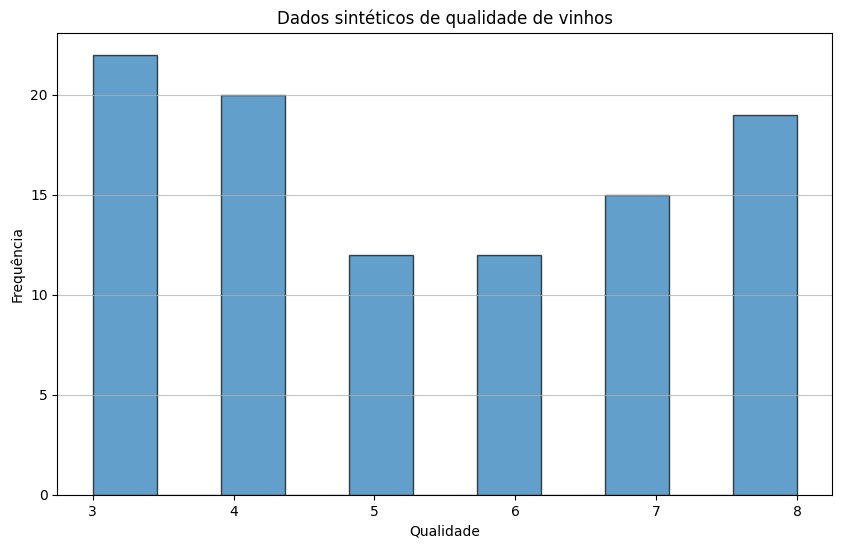

In [184]:
# Gerar o histograma para a variável 'quality'
plt.figure(figsize=(10, 6))
plt.hist(df_read['quality'], bins=11, edgecolor='black', alpha=0.7)
plt.title('Dados sintéticos de qualidade de vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Passo 7: Executar o modelo com o novo conjunto de dados

In [150]:
# Separar as features da nova base de dados (sem a coluna target)
X_new = df_new_loaded.drop(columns=['quality'])

In [151]:
# Imprimir as colunas da nova base de dados
print("Colunas da nova base de dados (X_new):")
print(X_new.columns)

Colunas da nova base de dados (X_new):
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [152]:
# Selecionar os mesmos atributos na nova base de dados
X_new_selected = selector.transform(X_new)

In [153]:
# Fazer previsões com o modelo treinado usando a nova base de dados
y_new_pred = model.predict(X_new_selected)

In [154]:
# Adicionar as previsões ao DataFrame da nova base de dados
df_new_loaded['predicted_quality'] = y_new_pred

In [174]:
# Visualizar as previsões
print("Primeiras linhas do novo DataFrame com previsões:")
print(df_new_loaded.head())

Primeiras linhas do novo DataFrame com previsões:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       9.184283          0.275233     0.337980        1.371117   0.010279   
1       8.079420          0.454284     0.376549        1.750145   0.060031   
2       9.446978          0.468311     0.475780        3.593684   0.090262   
3      10.970072          0.385590     0.470222        3.400622   0.092349   
4       7.912573          0.500969     0.008243        2.510529   0.067497   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            25.557817             71.374925  0.995707  3.450743   0.722674   
1            35.842498             16.130761  0.998693  3.232593   0.593132   
2             1.240983             75.080035  0.995362  3.324418   0.664887   
3            21.758658             91.070486  0.994024  3.240659   0.877337   
4             9.064279             60.072008  0.993742  3.244826   0.692487   

     a

In [175]:
# Salvar o DataFrame como um arquivo CSV
df_new_loaded.to_csv('new_winequality_red_predicted.csv', index=False)

In [176]:
# Baixar o arquivo CSV
files.download('new_winequality_red_predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
# Calcular a frequência de cada valor na coluna 'predicted_quality' ordenado por ordem crescente de "predicted_quality"
quality_counts = df_new_loaded['predicted_quality'].value_counts().sort_index()

In [180]:
# Exibir a frequência
print("\nFrequência de cada valor na coluna 'predicted_quality':")
print(quality_counts)


Frequência de cada valor na coluna 'predicted_quality':
predicted_quality
5    32
6    63
7     5
Name: count, dtype: int64


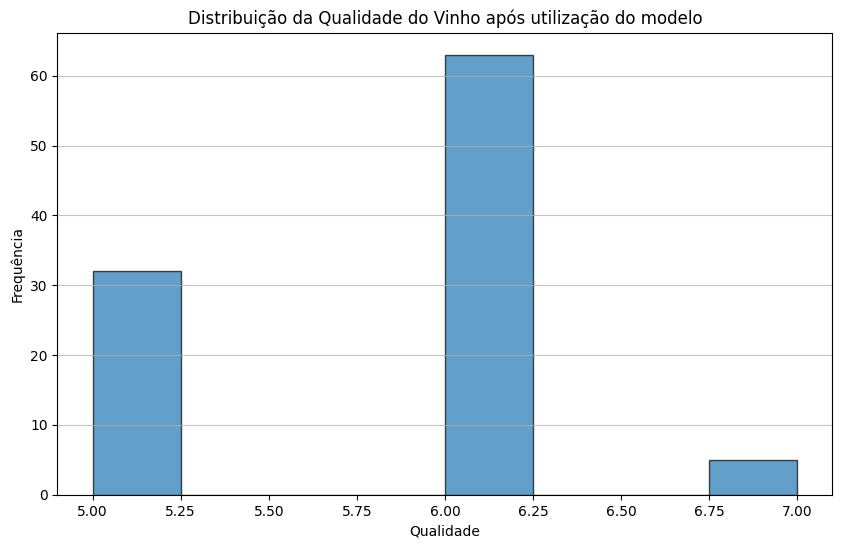

In [187]:
# Gerar o histograma para a variável 'predicted_quality'
plt.figure(figsize=(10, 6))
plt.hist(df_new_loaded['predicted_quality'], bins=8, edgecolor='black', alpha=0.7)
plt.title('Distribuição da Qualidade do Vinho após utilização do modelo')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()